In [1]:
from llm.core.rnn import *
from llm.core.visualization import *

2024-05-09 18:01:11.945441: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 18:01:13.042332: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/marco/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
from collections import Counter

# Training text
basic_text = 'Hello world, hello all, hello world. This is a phrase'

# Encode the text into sequences of integers and retrieve the word index
encoded, tokenizer = encode_text(basic_text)
vocab_size = len(tokenizer.word_index) + 1  # Including zero index
sequences = create_sequences(encoded)
max_length = max(len(seq) for seq in sequences)

padded_sequences = pad_sequences_to_same_length(sequences)
X, y = split_sequences(padded_sequences)
y = one_hot_encode_labels(y, vocab_size)

model = create_rnn_model(vocab_size, max_length)
model.fit(X, y, epochs=20, verbose=0)

In [3]:
from llm.core.rnn import extract_embeddings
embeddings, words = extract_embeddings(model, tokenizer)

(7, 7)

In [4]:
category_labels = extract_labels(words)
colors = map_labels_to_colors(category_labels)

/home/marco/Desktop/ATOM/LLM/llm/core/visualization.py:64: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(embed[:, 0], embed[:, 1], c=colors, cmap='viridis')


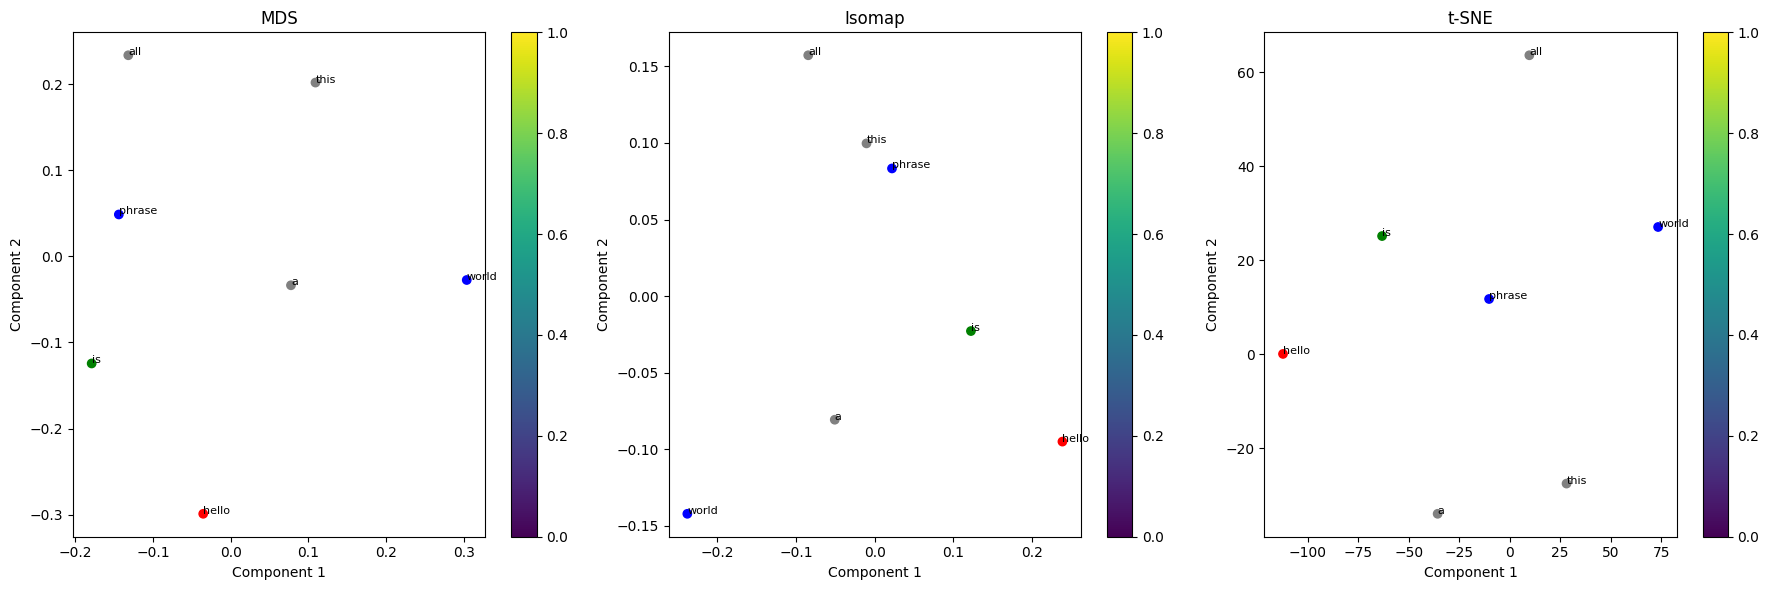

In [5]:
# Assuming you have embeddings and words

# Apply dimensionality reduction
embeddings_mds = apply_mds(embeddings)
embeddings_isomap = apply_isomap(embeddings)
embeddings_tsne = apply_tsne(embeddings)

# Plot the results
plot_embeddings(
    embeddings_list=[embeddings_mds, embeddings_isomap, embeddings_tsne],
    words=words,
    titles=['MDS', 'Isomap', 't-SNE'],
    colors=colors
)
